In [1]:
import cv2
import os
import matplotlib.pyplot as plt

In [2]:
os.listdir("../input/breast-ultrasound-images-dataset/Dataset_BUSI_with_GT/")

['benign', 'normal', 'malignant']

In [3]:
def import_images(folder,target):
    images = []
    for item in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,item),0)
        if img is not None:
            images.append([img,target])
    return images

In [4]:
bengin = import_images("../input/breast-ultrasound-images-dataset/Dataset_BUSI_with_GT/benign/",0)
malignant = import_images("../input/breast-ultrasound-images-dataset/Dataset_BUSI_with_GT/malignant/",1)
normal = import_images("../input/breast-ultrasound-images-dataset/Dataset_BUSI_with_GT/normal/",2)

In [5]:
bengin.extend(malignant)
bengin.extend(normal)
full_data = bengin

In [6]:
feature_matrix = []
label = []
for x,y in full_data:
    feature_matrix.append(x)
    label.append(y)

In [7]:
feature_matrix[0]

array([[  0,  58, 188, ..., 196, 185, 176],
       [  0, 136, 206, ..., 196, 184, 177],
       [  1, 196, 196, ..., 179, 174, 175],
       ...,
       [ 27,  27,  28, ...,  28,  29,  29],
       [ 20,  21,  22, ...,  26,  26,  26],
       [ 12,  13,  14, ...,  25,  24,  24]], dtype=uint8)

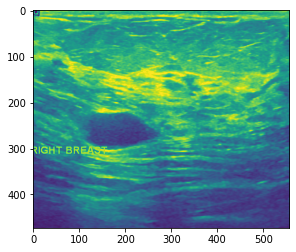

In [8]:
plt.imshow(feature_matrix[0])

In [9]:
label[0]

0

In [10]:
## resiized image
X=[]
img_size=128

for x in feature_matrix:
    new_array = cv2.resize(x,(img_size,img_size))
    X.append(new_array)
    

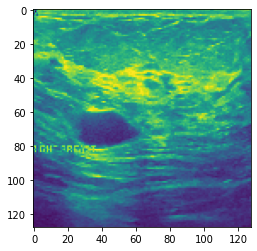

In [11]:
plt.imshow(X[0])

In [12]:
X_corrected = []
for image in X:
    image = image/255
    X_corrected.append(image)

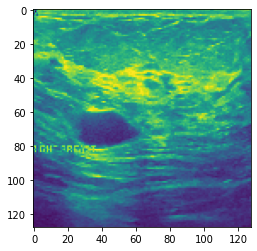

In [13]:
plt.imshow(X_corrected[0])

In [14]:
import numpy as np
np.array(X_corrected).shape

(1578, 128, 128)

In [15]:
X_M = np.array(X_corrected)

In [16]:
X_M.shape[1]

128

In [17]:
print(np.array(X_corrected).shape)
print(np.array(X_corrected).shape[0])
print(np.array(X_corrected).shape[1])
print(np.array(X_corrected).shape[2])

(1578, 128, 128)
1578
128
128


In [18]:
X_M_R =X_M.reshape(X_M.shape[0],X_M.shape[1],X_M.shape[2],1)

In [19]:
X_M_R.shape

(1578, 128, 128, 1)

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X_M_R,label)

In [22]:
import sys
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential ###
from tensorflow.keras.layers import Conv2D    ####
from tensorflow.keras.layers import MaxPooling2D  ###
from tensorflow.keras.layers import Dense   ###
from tensorflow.keras.layers import Flatten ###
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam ####

In [23]:
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(128, 128,1)))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(3, activation='softmax'))
    # compile model
    opt = Adam(lr=0.001)
    model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

## sparse_categorical_crossentropy

In [24]:
model =  define_model()
print("Step Fit")
history = model.fit(np.array(X_train),np.array(y_train), epochs=50,validation_data=(X_test, np.array(y_test)))


User settings:

   KMP_AFFINITY=granularity=fine,verbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_DUPLICATE_LIB_OK=True
   KMP_INIT_AT_FORK=FALSE
   KMP_SETTINGS=1
   KMP_WARNINGS=0

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=true
   KMP_ENABLE_TASK_THROTTLING=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_PLAIN_BARRIER='2,2'
   KMP_PLAIN_BARRIER_P

Step Fit


2021-10-23 18:10:58.949785: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50
37/37 [==============================] - 52s 1s/step - loss: 0.9103 - accuracy: 0.5621 - val_loss: 0.7989 - val_accuracy: 0.5544
Epoch 2/50
37/37 [==============================] - 50s 1s/step - loss: 0.7560 - accuracy: 0.6610 - val_loss: 0.7774 - val_accuracy: 0.6127
Epoch 3/50
37/37 [==============================] - 50s 1s/step - loss: 0.6908 - accuracy: 0.6898 - val_loss: 0.6210 - val_accuracy: 0.7367
Epoch 4/50
37/37 [==============================] - 50s 1s/step - loss: 0.5556 - accuracy: 0.7388 - val_loss: 0.5483 - val_accuracy: 0.7544
Epoch 5/50
37/37 [==============================] - 50s 1s/step - loss: 0.4836 - accuracy: 0.7836 - val_loss: 0.4882 - val_accuracy: 0.7696
Epoch 6/50
37/37 [==============================] - 50s 1s/step - loss: 0.4564 - accuracy: 0.7937 - val_loss: 0.6365 - val_accuracy: 0.7646
Epoch 7/50
37/37 [==============================] - 50s 1s/step - loss: 0.3942 - accuracy: 0.8208 - val_loss: 0.5155 - val_accuracy: 0.7899
Epoch 8/50
37/37 [==

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


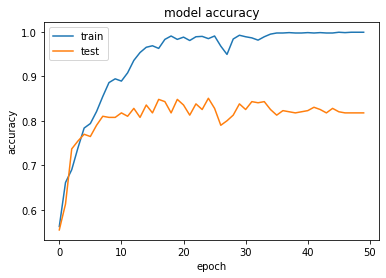

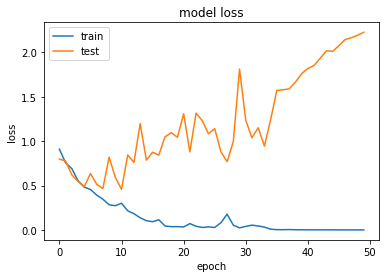

In [25]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [26]:
print("Step Eval")
model.evaluate(np.array(X_test),np.array(y_test))

Step Eval
13/13 [==============================] - 4s 280ms/step - loss: 2.2263 - accuracy: 0.8177


[2.226283073425293, 0.8177215456962585]

In [27]:
print("Step save")
model.save('BreastCancerClassifer.h5')

Step save


In [28]:
predicted = []
for item in model.predict(X_test):
    predicted.append(np.argmax(item))

In [29]:
X_test.shape

(395, 128, 128, 1)

In [30]:
#### lebel of the X_test prediction
for item in predicted:
    print(item,)

0
1
0
0
0
0
0
0
2
0
0
0
0
1
1
0
0
0
0
2
0
0
0
0
2
0
0
0
0
2
2
1
0
2
0
1
2
0
0
2
0
0
0
0
0
0
1
1
0
1
1
0
0
0
0
0
0
1
0
1
0
1
2
2
2
0
0
0
0
2
1
0
0
1
0
0
0
0
0
2
0
0
0
0
0
2
2
0
2
0
1
0
0
0
2
0
2
0
2
1
0
0
1
2
0
0
0
2
0
2
0
1
0
0
1
1
0
0
1
0
0
1
0
0
2
2
1
0
0
1
1
1
0
1
0
0
2
0
2
2
1
0
1
0
0
0
2
1
0
0
2
0
0
0
1
0
1
2
0
1
0
1
0
2
1
0
0
0
2
0
0
0
0
0
1
1
0
1
1
0
0
2
0
0
2
1
0
2
0
0
0
0
1
0
2
1
2
2
0
0
1
2
0
1
0
0
0
0
0
0
0
1
0
2
2
0
2
2
1
0
0
1
2
0
1
2
0
0
1
0
0
0
0
2
0
0
0
0
0
0
2
0
0
0
0
0
0
0
2
0
0
2
0
0
1
0
0
0
0
0
0
0
0
1
0
0
0
1
0
2
1
2
0
2
0
2
1
0
1
1
0
1
2
0
0
0
0
0
0
0
0
0
0
0
0
2
0
0
0
0
1
0
1
0
0
0
0
0
2
1
1
2
0
2
0
0
1
0
0
0
0
0
0
0
0
2
0
1
2
0
2
0
0
0
0
0
0
0
1
0
0
0
0
2
0
1
0
0
0
0
0
0
0
1
2
0
2
0
0
0
1
0
0
0
0
0
1
0
0
0
0
0
0
0
0
1
0
2
0
0
0
0
0
2
0
0
0
2
0
0
0
1
1
0
0


<AxesSubplot:>

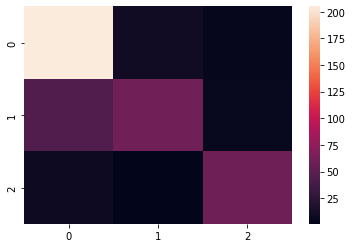

In [31]:
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(y_test,predicted)
import seaborn as sns
sns.heatmap(conf)

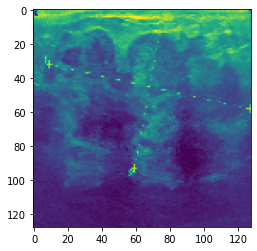

In [32]:
X_test.shape
img = X_test[0]
plt.imshow(img)

In [33]:
img1=img.reshape(1,X_M.shape[1],X_M.shape[2],1)
img1.shape

(1, 128, 128, 1)

In [34]:
np.argmax(model.predict(img1))

0

In [35]:
def image_prediction(img):
#     plt.imshow(img)
    img1=img.reshape(1,128,128,1)
    predict = np.argmax(model.predict(img1))
    if predict==0:
        print("YOU ARE IN NORMAL CONDITION NO NEED TO WORRY ABOUT")
    elif predict==1:
        print("the cells are not yet cancerous, but they have the potential to become malignant consult the doctor")
    else:
        print("Malignant tumors are cancerous. The cells can grow and spread to other parts of the body.")
        

In [36]:
image_prediction(X_test[0])

YOU ARE IN NORMAL CONDITION NO NEED TO WORRY ABOUT


In [37]:
image_prediction(X_test[3])

YOU ARE IN NORMAL CONDITION NO NEED TO WORRY ABOUT
